# 0.0 IMPORTS

In [71]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
from IPython.display import Image
#%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')

import datetime

# 0.1 Helper Functions

In [2]:
#!pip install inflection==0.5.1

In [3]:
!pip freeze | grep inflec

inflection==0.5.1


## 0.1 Helper Functions

In [36]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize']=[25,12]
    plt.rcParams['font.size']=24

    display(HTML('<style>.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

In [37]:
jupyter_settings()

# 0.2 Loading Data

In [6]:
# print("read_csv("data_set/stores.csv)")
pd.read_csv("Rossmann-Store-Sales-Prediction/dataset/train.csv", low_memory=False)
df_sales_raw=pd.read_csv("Rossmann-Store-Sales-Prediction/dataset/train.csv", low_memory=False)

pd.read_csv("Rossmann-Store-Sales-Prediction/dataset/store.csv", low_memory=False)
df_store_raw=pd.read_csv("Rossmann-Store-Sales-Prediction/dataset/store.csv", low_memory=False)
# /home/cab/ds_in_deploy/Rossmann-Store-Sales-Prediction/dataset

In [7]:
#df_sales_raw #1001599 rows × 10 columns
df_store_raw #1115 rows × 10 columns

#arquivo_referencia, anexado a referencia, como faremos o merge, a coluna igual nos dois  
df_raw=pd.merge(df_sales_raw, df_store_raw, how='left') #1001599 rows × 19 columns
# so alterou o numero de colunas

In [8]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
946487,638,2,2013-02-19,5862,430,1,1,0,0,237011,d,a,10170.0,11.0,2001.0,0,NaN,NaN,NaN


# 1.0. PASSO 01 - DESCRIÇÃO DOS DADOS

## 1.1 Rename Columns

In [9]:
# fazendo uma copia da seccao anterior 
df1=df_raw.copy()
#list(df1.columns)

In [10]:
cols_old=list(df1.columns) 


In [11]:
snakecase = lambda x: inflection.underscore(x)
#mapeando a função
cols_new = list(map(snakecase, cols_old))
#rename
df1.columns=cols_new
#cols_new

## 1.2 Data Dimensions

In [12]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1001599
Number of Cols: 19


## 1.3 Data Types

In [13]:
df1['date']=pd.to_datetime(df1['date'])
df1.dtypes 

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
id                                       int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [14]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
id                                   0
store_type                           0
assortment                           0
competition_distance              2600
competition_open_since_month    318392
competition_open_since_year     318392
promo2                               0
promo2_since_week               500415
promo2_since_year               500415
promo_interval                  500415
dtype: int64

## 1.5 Fillout NA

In [15]:
df1.sample().T

,993631
store,952
day_of_week,2
date,2013-01-08 00:00:00
sales,6780
customers,512
open,1
promo,1
state_holiday,0
school_holiday,0
id,978263


In [16]:
atributo='competition_open_since_month'
df1[atributo]= df1.apply(lambda x: x['date'].month if math.isnan(x[atributo]) else x[atributo], axis=1) #axis=1 aplicando ao longo das colunas 

In [17]:
atributo='competition_open_since_year'
df1[atributo]= df1.apply(lambda x: x['date'].year if math.isnan(x[atributo]) else x[atributo], axis=1) #axis=1 aplicando ao longo das colunas 

In [18]:
atributo='promo2_since_week'
df1[atributo]= df1.apply(lambda x: x['date'].week if math.isnan(x[atributo]) else x[atributo], axis=1) #axis=1 aplicando ao longo das colunas 

In [19]:
atributo='promo2_since_year'
df1[atributo]= df1.apply(lambda x: x['date'].year if math.isnan(x[atributo]) else x[atributo], axis=1) #axis=1 aplicando ao longo das colunas 

In [20]:
#competition_distance              2600
#print(df1[1])
#df1['competition_distance'] =df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month    318392
# se for verdade extraimos o mes
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].moth if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
print('done')
df1.sample()
#competition_open_since_year     318392
#atributo='competition_open_since_year'
#df1[atributo] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

#promo2_since_week               500415
#promo2_since_year               500415
#promo_interval                  500415

done


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,id,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
984977,103,2,2013-01-15,0,0,0,0,0,0,896989,d,c,5210.0,5.0,2015.0,0,3.0,2013.0,NaN


In [21]:
#promo_interval                  500415
month_map = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df1['promo_interval'].fillna(0, inplace=True) # fazendo modificação directa na coluna
#criando nova coluna
df1['month_map'] = df1['date'].dt.month.map(month_map) # os numeros serão trocados pelas letras
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1) 
# criando lista dos elementos da coluna promo_interval e verificar se month_map está dentro da lista do intervalo

## 1.6 Check Type

In [22]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
id                                       int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [23]:

#competition_open_since_month           float64
atributo='competition_open_since_month'
df1[atributo]=df1[atributo].astype(int)
#competition_open_since_year            float64
atributo='competition_open_since_year'
df1[atributo]=df1[atributo].astype(int)
#promo2_since_week                      float64
atributo='promo2_since_week'
df1[atributo]=df1[atributo].astype(int)
#promo2_since_year                      float64
atributo='promo2_since_year'
df1[atributo]=df1[atributo].astype(int)

## 1.7 Descriptive Statistical, ganhando conhecimento do negocio e detectar alguns erros

In [24]:
num_attributes = df1.select_dtypes(include=['int64', 'float64']) # todos os atributos sao de variavel numerica
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']) #include=['object']
obj_attributes = df1.select_dtypes(include=['object']) #include=['object']

In [25]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
441623,0,c,a,"Jan,Apr,Jul,Oct",May
889120,0,a,c,"Feb,May,Aug,Nov",Apr


In [26]:
obj_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
53503,0,a,c,"Jan,Apr,Jul,Oct",May
558721,0,a,a,0,Fev


In [27]:
num_attributes.sample() #

,store,day_of_week,sales,customers,open,promo,school_holiday,id,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
790109,360,2,5782,688,1,0,1,976141,2040.0,6,2007,0,28,2013,0


In [28]:
# Central tendency - mean, median
# Dispersion - std, min, max, range, skew, kurtosis

### 1.7.1 Numerical Attributes

In [29]:
# Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply(np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1=pd.DataFrame(num_attributes.apply(np.std)).T
d2=pd.DataFrame(num_attributes.apply(min)).T
d3=pd.DataFrame(num_attributes.apply(max)).T
d4=pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5=pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6=pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
#nomeando os atributos, as colunas
m.columns=['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.436424,558.0,321.909047,-0.000970,-1.200532
1,day_of_week,1.0,7.0,6.0,3.998315,4.0,1.997349,0.001618,-1.246824
2,sales,0.0,41551.0,41551.0,5770.573039,5741.0,3852.565888,0.643199,1.780100
3,customers,0.0,7388.0,7388.0,633.302988,610.0,464.942753,1.596438,7.073761
4,open,0.0,1.0,1.0,0.829645,1.0,0.375944,-1.753697,1.075454
5,promo,0.0,1.0,1.0,0.381894,0.0,0.485851,0.486181,-1.763631
6,school_holiday,0.0,1.0,1.0,0.173460,0.0,0.378644,1.724790,0.974903
7,id,0.0,1017207.0,1017207.0,508518.856749,508810.0,293464.542300,-0.000361,-1.199537
8,competition_distance,20.0,75860.0,75840.0,5430.478119,NaN,7716.182396,2.928578,12.999457
9,competition_open_since_month,1.0,12.0,11.0,6.781137,7.0,3.319975,-0.039549,-1.241021


seaborn @ file:///home/conda/feedstock_root/build_artifacts/seaborn-split_1696262444380/work


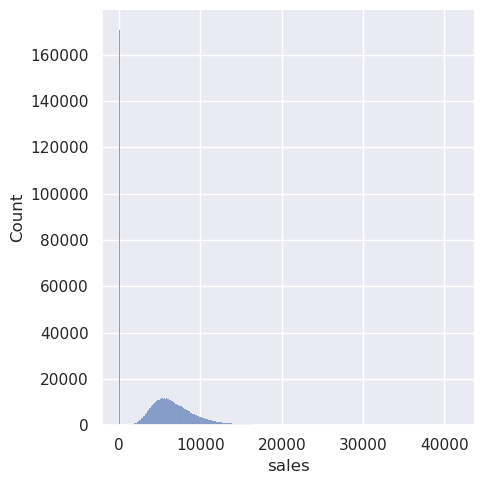

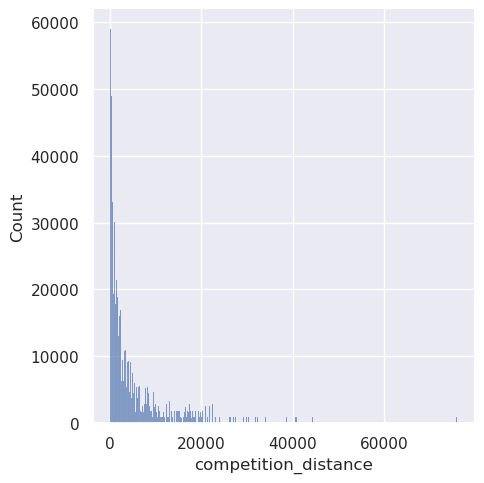

In [38]:
#sns.distplot(df1['sales']) #`distplot` is a deprecated function and will be removed in seaborn v0.14.0.
sns.displot(df1['sales'])
sns.displot(df1['competition_distance']) 
!pip freeze | grep seaborn

### 1.7.2 Categorial Attributes

In [31]:
#Quantos niveis cada variável categorica tem? Como aplicar 1 função em todas as colunas?
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [32]:
#Quantos niveis cada variável categorica tem? Como aplicar 1 função em todas as colunas?
cat_attributes.apply(lambda x: x.unique())

state_holiday                                          [0, a, b, c]
store_type                                             [c, a, d, b]
assortment                                                [a, c, b]
promo_interval    [0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,...
month_map         [Jul, Jun, May, Apr, Mar, Fev, Jan, Dec, Nov, ...
dtype: object

In [33]:
# a dimensão das variáveis está muito diferente
# provavel razão, dias fechado tendo vendas igual a zero

<Axes: xlabel='state_holiday', ylabel='sales'>

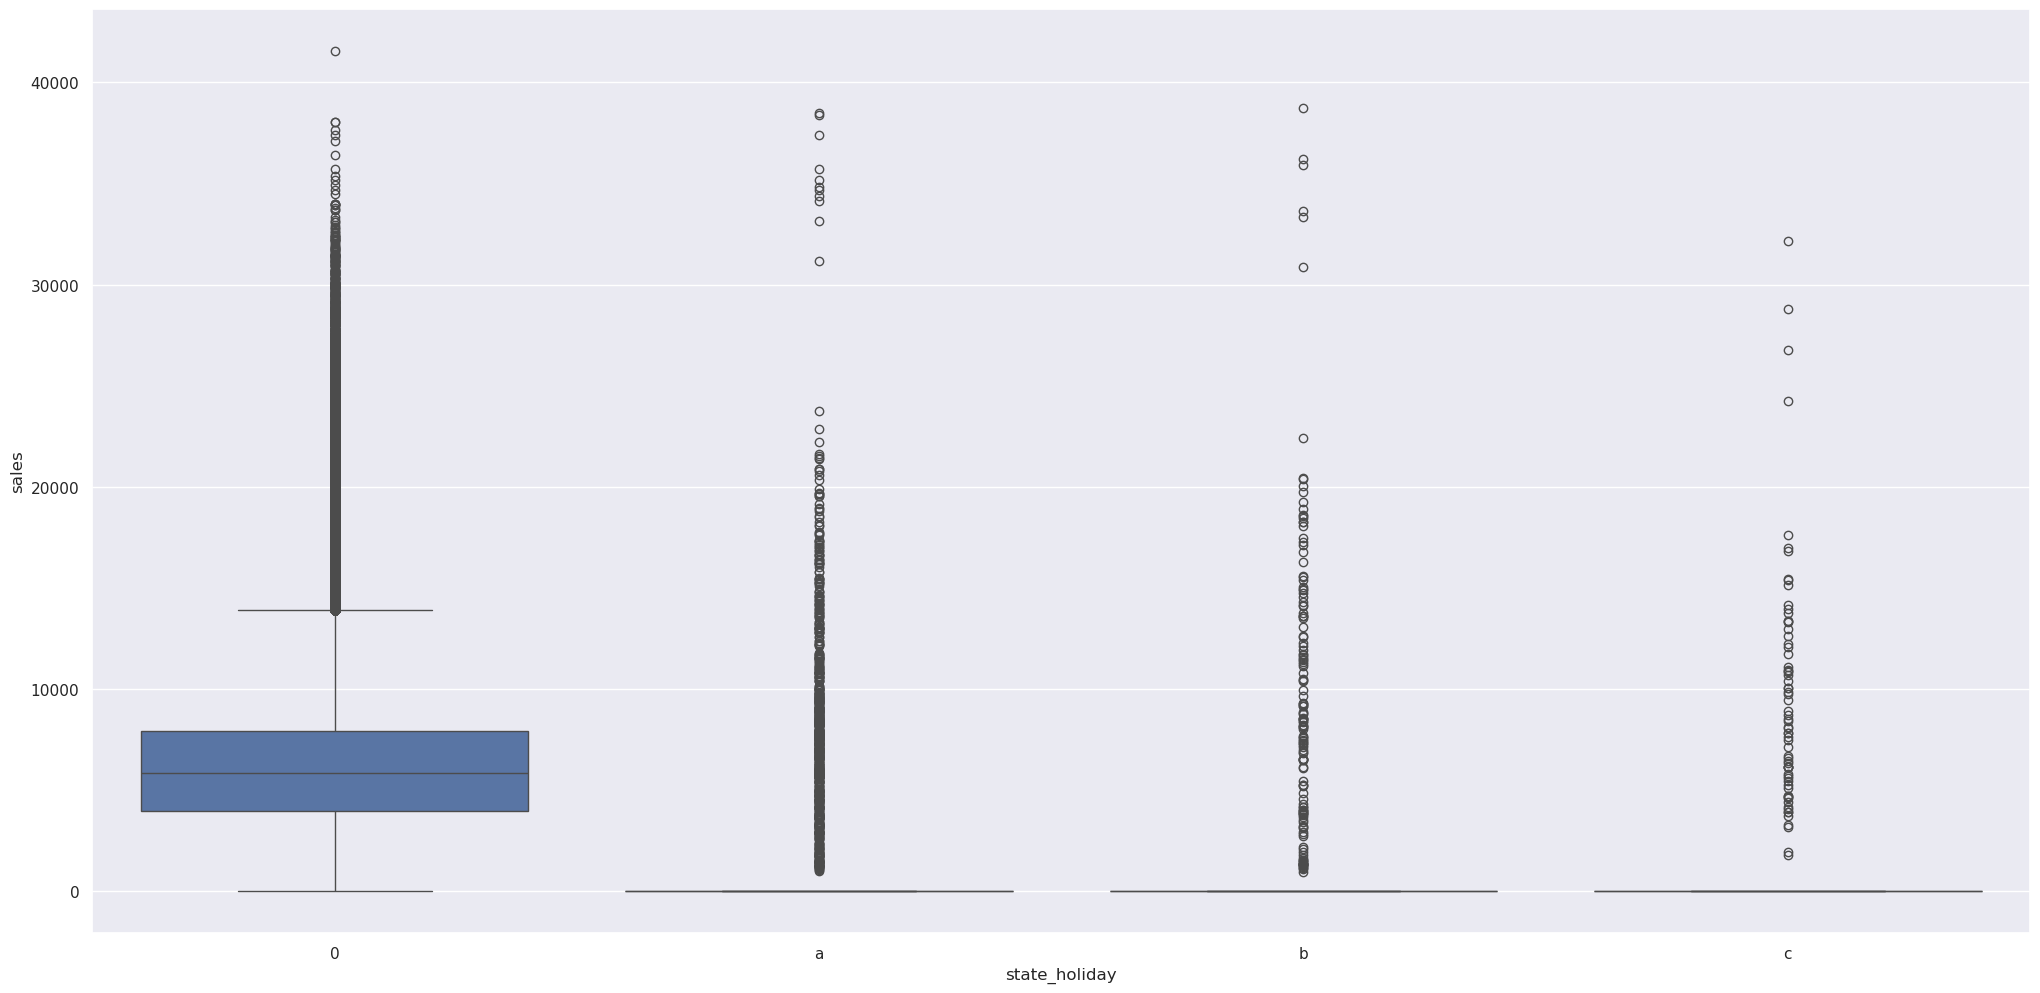

In [34]:
aux1=df1[(df1['state_holiday']!=0) & (df1['sales']>0)]
sns.boxplot(x='state_holiday', y='sales', data=df1)

<Axes: xlabel='assortment', ylabel='sales'>

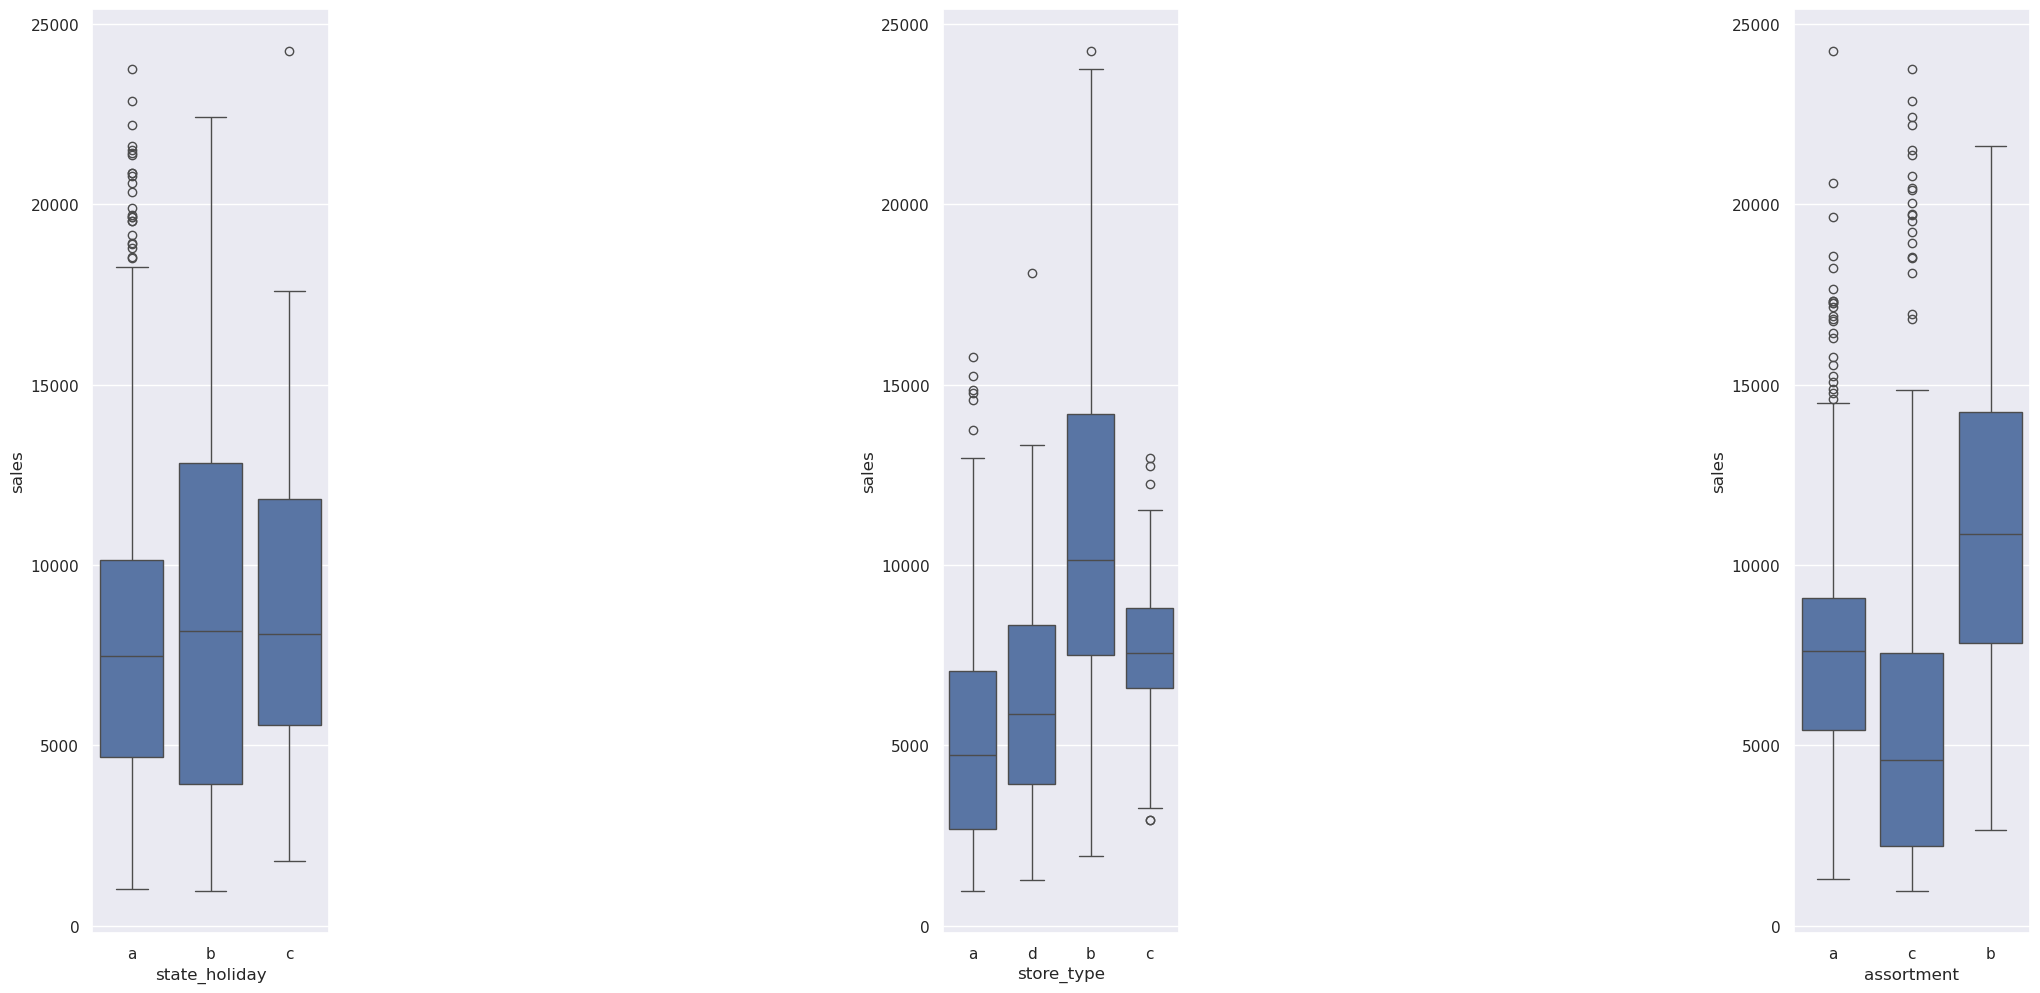

In [35]:
aux1=df1[(df1['state_holiday']!='0') & (df1['sales']>0) & (df1['sales']<25000)] #dia diferente do feriado e com vendas acima de zero

plt.subplot(1,7,1) #1 linha, 3 colunas, na posicão 1
sns.boxplot(x='state_holiday', y='sales', data=aux1)
 
plt.subplot(1,7,4) #1 linha, 3 colunas, na posicão 2
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,7,7) #1 linha, 3 colunas, na posicão 1
sns.boxplot(x='assortment', y='sales', data=aux1)


# 2.0. PASSO 02 - FEATURE ENGINEERING

In [42]:
df2=df1.copy()

## 2.1. Mapa Mental de Hipoteses

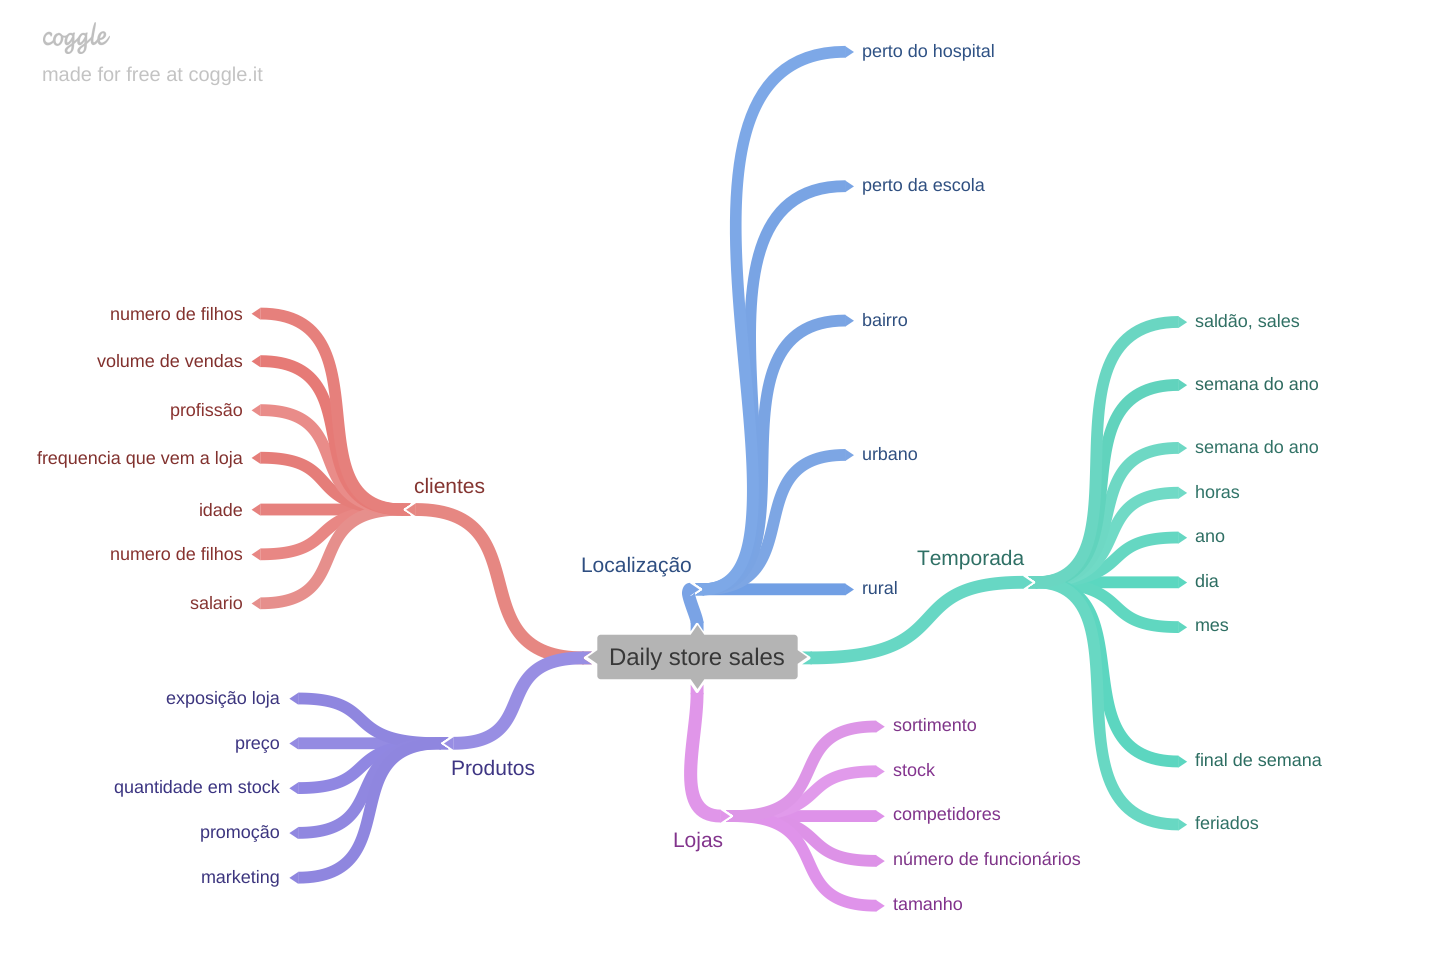

In [40]:
Image('img/MindMapHipoteses_m03.png')

## 2.1. Criação de Hipoteses

### 2.1.1. Hipóteses Loja

In [ ]:
** 1.** Lojas com maior quadro de funcionários deveriam vender mais.

** 1. ** Lojas com maior estoque deveriam vender mais.

**1.** Lojas com porte maior deveriam vender mais.

**1.** Lojas com menor porte deveriam vender menos.

**1.** Lojas com maior sortimento deveriam vender mais.

### 2.1.2. Hipóteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produtos nas vitrines deveriam vender mais.

**3.** Lojas com produtos com preços menores deveriam vender mais.

**4.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

**5.** Lojas com promoções activas por mais tempo deveriam vender mais.

**6.** Lojas com + dias de promoção deveriam vender +.

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com + promoções consecutivas deveriam vender +.

### 2.1.3. Hipóteses Tempo

In [ ]:
**1.** Lojas abertas durante o feriado de Natal deveriam vender menos.

**1.** Lojas ao longo do ano deveriam vender mais.

**1.** Lojas no segundo semestre do ano deveriam vender mais.

**1.** Lojas depois do dia 10 de cada mes deveriam vender mais.

**1.** Lojas nos finais de semana deveriam vender menos.

**1.** Lojas nos Feriados escolares deveriam vender menos.
    

## 2.2. Lista Final de Hipóteses

In [ ]:
**[1., 3.]** Lojas com [maior sortimento/ competidores à + tempo]  deveriam vender +.

In [ ]:
**[2., ]** Lojas com competidores + próximo deveriam vender - .

In [ ]:
** Produtos **

In [ ]:
**[4., 5., 6.]** Lojas [promoções activas por mais tempo, com + [dias de promoção, promoções consecutivas]]  deveriam vender +

In [ ]:
** Tempo **

In [ ]:
**7.** Lojas abertas durante o feriado de Natal deveriam vender menos.

**8.** Lojas ao longo do ano deveriam vender mais.

**9.** Lojas no segundo semestre do ano deveriam vender mais.

**10.** Lojas depois do dia 10 de cada mes deveriam vender mais.

**11.** Lojas nos finais de semana deveriam vender menos.

**12.** Lojas nos Feriados escolares deveriam vender menos.

## 2.3. Feature Engineeringn

In [44]:
df2.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,id,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
576265,596,5,2014-01-17,3207,548,1,0,0,0,436867,c,a,290.0,9,2006,0,3,2014,0,Jan,0


In [74]:
# year
df2['year']=df2['date'].dt.year

# month
df2['month']=df2['date'].dt.month

# day
df2['day']=df2['date'].dt.day

# week of year
# df2['week_of_year']=df2['date'].dt.weekofyear #AttributeError: 'DatetimeProperties' object has no attribute 'weekofyear'
# Deprecated since version 1.1.0.
#https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.Series.dt.weekofyear.html

#df2['week_of_year']=df2['date'].dt.isocalendar()
#df2['week_of_year']=df2['date'].dt.isocalendar().week

#df2['week_of_year']=df2['date'].dt.week #AttributeError: 'DatetimeProperties' object has no attribute 'week'

# year week
df2['year_week']=df2['date'].dt.strftime('%Y-%W') #AttributeError: 'DatetimeProperties' object has no attribute 'srtftime'
df2['year_week'].sample(5)
# competition since
#competition_open_since_month	competition_open_since_year
year='competition_open_since_year'
month='competition_open_since_month'
df2['competition_open_since']=df2.apply( lambda x: datetime.datetime(year=x[year],month=x[month],day=1), axis=1) # considerou-se que o primeiro dia do mes, o dia que iniciou a competição
#tempo desde que a competição começou em meses
df2['competition_time_month']=((df2['date']-df2['competition_open_since'])/30).apply(lambda x: x.days).astype(int)
df2['competition_time_month'].sample()

# promo since
# promo2_since_week	promo2_since_year

# assortment
# state holiday

595442    1
Name: competition_time_month, dtype: int64

In [77]:
# promo since
# promo2_since_week	promo2_since_year
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'].sample()


717774    2013-5
Name: promo_since, dtype: object

In [78]:
#passando a campo 'promo_since' de string para datetime64
df2['promo_since']=df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))

df2['promo_since'].sample()

55496   2011-03-28
Name: promo_since, dtype: datetime64[ns]

In [80]:
df2['promo_time_week']=((df2['date']-df2['promo_since'])/7).apply(lambda x: x.days).astype(int)
df2['promo_time_week'].sample(5)

450798      0
132199      0
70690      93
280342      0
240247    193
Name: promo_time_week, dtype: int64

In [84]:
# assortment

df2['assortment']=df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x=='b' else 'extended')
df2['assortment'].sample(5)


3406      extended
372833    extended
226339    extended
136161    extended
95265     extended
Name: assortment, dtype: object

In [94]:
df2=df1.copy()

In [101]:
df2['state_holiday'].unique()

array([None], dtype=object)

In [100]:
# state holiday
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
df2['state_holiday']=df2['state_holiday'].apply(lambda x: 'public holiday' if x=='a' else 'Easter holiday' if x=='b'  else 'Christmas' if x=='c' else None)
df2['state_holiday'].unique()

array([None], dtype=object)